### Problem 1
Implement coordinate descent with analytic line search for Matyas function:
$$f(x,y) = 0.26(x^2 + y^2) - 0.48xy$$
on the interval $[-10;10] \times [-10;10]$. Plot the behavior of the optimization process on the contour map of the function. 

Useful function: `pyplot.contour`, `np.meshgrid`

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la

In [2]:
def f(x, y):
    return 0.26*(x**2 + y**2) - 0.48*x*y

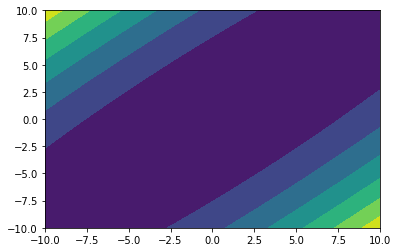

In [3]:
x_min, x_max = -10, 10
y_min, y_max = -10, 10

x_base = np.linspace(x_min, x_max, 100)
y_base = np.linspace(y_min, y_max, 100)

xx, yy = np.meshgrid(x_base, y_base, sparse=True)
z = f(xx, yy)
plt.contourf(x_base, y_base, z)
plt.show()

In [16]:
def line_search_analitic(x, d):
    alpha = (12*x[0]*d[1] + 12*x[1]*d[0] - 13*x[0]*d[0] - 13*x[1]*d[1])/(13*d[0]**2 + 13*d[1]**2 -24*d[0]*d[1])
    return x + d*alpha

In [17]:
x0 = np.array([np.random.uniform(x_min, x_max, 1), np.random.uniform(y_min, y_max, 1)]).reshape((2,))

In [21]:
x_prev = x0.copy()
d_x = np.array([1, 0])
d_y = np.array([0, 1])
opt_trajectory = [x_prev]
for i in range(100):
    x_next = line_search_analitic(x_prev, d_x)
    x_prev = x_next.copy()
    opt_trajectory.append(x_prev.copy())
    x_next = line_search_analitic(x_prev, d_y)
    x_prev = x_next.copy()
    opt_trajectory.append(x_prev.copy())
    
    if np.abs(f(opt_trajectory[-1][0], opt_trajectory[-1][1])-f(opt_trajectory[-2][0], opt_trajectory[-2][1]))<1e-7:
        break

In [22]:
print(len(opt_trajectory), opt_trajectory[-1], f(opt_trajectory[-1][0], opt_trajectory[-1][1]))

81 [-0.00346901 -0.00320216] 4.628469428680066e-07


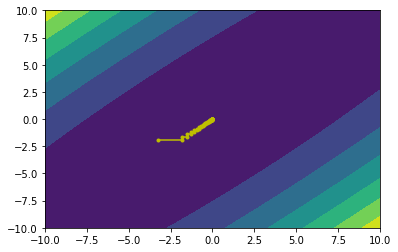

In [24]:
plt.contourf(x_base, y_base, z)
plt.plot(np.array(opt_trajectory)[:,0], np.array(opt_trajectory)[:,1], 'y.-')
plt.show()

### Problem 2
Implement gradient descent with momentum for Matyas function with analytical and approximated gradient:
$$f(x,y) = 0.26(x^2 + y^2) - 0.48xy$$
on the interval $[-10;10] \times [-10;10]$. Plot the behavior of the optimization process on the contour map of the function. Compare with regular gradient descent.

Useful function: `pyplot.contour`, `np.meshgrid`

In [ ]:
x0 = np.array([np.random.uniform(x_min, x_max, 1), np.random.uniform(y_min, y_max, 1)]).reshape((2,))

In [23]:
def grad_f(x, y):
    return np.array([0.52*x - 0.48*y, 0.52*y-0.48*x])

In [32]:
x_prev = x0.copy()
opt_trajectory = [x_prev]
gamma = 0.9
lr = 0.1
v = np.array([0, 0])
for i in range(1000):
    grad = grad_f(x_prev[0], x_prev[1])
    v = gamma*v + lr * grad
    x_next = x_prev - v
    
    x_prev = x_next.copy()
    opt_trajectory.append(x_prev.copy())
    
    if np.abs(f(opt_trajectory[-1][0], opt_trajectory[-1][1])-f(opt_trajectory[-2][0], opt_trajectory[-2][1]))<1e-7:
        break

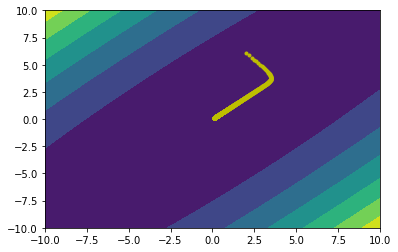

In [33]:
plt.contourf(x_base, y_base, z)
plt.plot(np.array(opt_trajectory)[:,0], np.array(opt_trajectory)[:,1], '.y')
plt.show()

In [34]:
print(len(opt_trajectory), opt_trajectory[-1], f(opt_trajectory[-1][0], opt_trajectory[-1][1]))

1001 [0.07323382 0.07323382] 0.00021452770439862878


### Problem 3
Implement Newton method for McCormick function ([link](https://www.sfu.ca/~ssurjano/mccorm.html)):
$$f(x,y) = \sin(x+y) + (x-y)^2-1.5x+2.5y+1$$
on the interval $[-1.5;4] \times [-3;4]$. Plot the behavior of the optimization process on the contour map of the function. Select starting point randomly as in previous problems. Compare to steepest gradient descent on the same function.

In [72]:
def f(x, y):
    return np.sin(x+y) + (x-y)**2 -1.5*x +2.5*y +1
    
def grad_f(x, y):
    return np.array([np.cos(x+y)+2*(x-y)-1.5,
                    np.cos(x+y)+2*(y-x)+2.5])

def hessian_f(x, y):
    return np.array([[-np.sin(x+y)+2, -np.sin(x+y)-2],
                    [-np.sin(x+y)-2, -np.sin(x+y)+2]])

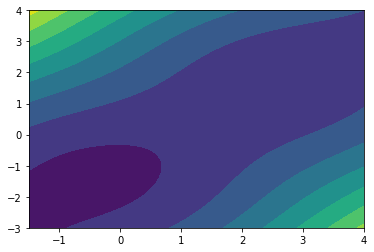

In [73]:
x_min, x_max = -1.5, 4
y_min, y_max = -3, 4

x_base = np.linspace(x_min, x_max, 100)
y_base = np.linspace(y_min, y_max, 100)

xx, yy = np.meshgrid(x_base, y_base, sparse=True)
z = f(xx, yy)
plt.contourf(x_base, y_base, z)
plt.show()

In [82]:
x0 = np.array([np.random.uniform(x_min, x_max, 1), np.random.uniform(y_min, y_max, 1)]).reshape((2,))

In [75]:
def line_search_golden_ratio(x, d):
    # find intersection with interval borders
    if d[0]!=0 and (x_min - x[0])/d[0] > 0:
        alpha = (x_min - x[0])/d[0]
    else:
        alpha = 1e10
    if d[1]!=0 and (y_min - x[1])/d[1] > 0:
        alpha = min(alpha, (y_min - x[1])/d[1])
    if d[0]!=0 and (x_max - x[0])/d[0] > 0:
        alpha = min(alpha, x_max - x[0])/d[0]
    if d[1]!=0 and (y_max - x[1])/d[1] > 0:
        alpha = min(alpha, (y_max - x[1])/d[1])
    # from now on we search in the interval [0, a]
    left, right = 0, alpha
    tau = (1+np.sqrt(5))/2
    while np.abs(right-left) > 1e-5:
        a = left + (right - left)*(2-tau)
        b = left + (right - left)*(tau-1)
        # we need to calculate -f because the search method is 
        f_a = -f(x[0]+a*d[0], x[1]+a*d[1])
        f_b = -f(x[0]+b*d[0], x[1]+b*d[1])
        if f_a == f_b:
            left, right = a, b
        if f_a > f_b:
            right = b
        if f_a < f_b:
            left = a
    return x + (left+right)/2 * d

In [83]:
x_prev = x0.copy()
opt_trajectory = [x_prev]
lr = 0.1
for i in range(1000):
    H = hessian_f(x_prev[0], x_prev[1])
    grad = grad_f(x_prev[0], x_prev[1])
    x_next = line_search_golden_ratio(x_prev, -(la.inv(H)@grad))
    x_prev = x_next.copy()
    opt_trajectory.append(x_prev.copy())
    
    if np.abs(f(opt_trajectory[-1][0], opt_trajectory[-1][1])-f(opt_trajectory[-2][0], opt_trajectory[-2][1]))<1e-7:
        break

In [84]:
x_prev = x0.copy()
gd_opt_trajectory = [x_prev]
lr = 0.1

for i in range(1000):
    grad = grad_f(x_prev[0], x_prev[1])
    x_next = line_search_golden_ratio(x_prev, -grad)
    
    x_prev = x_next.copy()
    gd_opt_trajectory.append(x_prev.copy())
    
    if np.abs(f(gd_opt_trajectory[-1][0], gd_opt_trajectory[-1][1])-f(gd_opt_trajectory[-2][0], gd_opt_trajectory[-2][1]))<1e-7:
        break

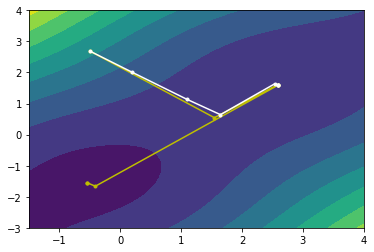

In [85]:
plt.contourf(x_base, y_base, z)
plt.plot(np.array(opt_trajectory)[:,0], np.array(opt_trajectory)[:,1], 'y.-')
plt.plot(np.array(gd_opt_trajectory)[:,0], np.array(gd_opt_trajectory)[:,1], 'w.-')
plt.show()

In [86]:
print(len(gd_opt_trajectory), gd_opt_trajectory[-1], f(gd_opt_trajectory[-1][0], gd_opt_trajectory[-1][1]))


8 [2.59438745 1.59438708] 1.2283696987153094


In [87]:
print(len(opt_trajectory), opt_trajectory[-1], f(opt_trajectory[-1][0], opt_trajectory[-1][1]))

7 [-0.54719755 -1.54719755] -1.9132229549810362


### Problem 4
Implement gradient descent with Golden Ratio line search for Goldstein–Price function:
$$f(x,y)=\left[1+\left(x+y+1\right)^{2}\left(19-14x+3x^{2}-14y+6xy+3y^{2}\right)\right]
\left[30+\left(2x-3y\right)^{2}\left(18-32x+12x^{2}+48y-36xy+27y^{2}\right)\right]$$
on the interval $[-10;10] \times [-10;10]$. Plot the behavior of the optimization process on the contour map of the function. Find gradients using finite difference approximation.

Useful function: `pyplot.contour`, `np.meshgrid`

### Problem 5
Implement gradient descent with Golden Ratio line search for Goldstein–Price function:
$$f(x,y)=\left[1+\left(x+y+1\right)^{2}\left(19-14x+3x^{2}-14y+6xy+3y^{2}\right)\right]
\left[30+\left(2x-3y\right)^{2}\left(18-32x+12x^{2}+48y-36xy+27y^{2}\right)\right]$$
on the interval $[-10;10] \times [-10;10]$. Plot the behavior of the optimization process on the contour map of the function. Find gradients analytically.

Useful function: `pyplot.contour`, `np.meshgrid`

### Problem 6
Implement coordinate descent with Nesterov momentum for McCormick function ([link](https://www.sfu.ca/~ssurjano/mccorm.html)):
$$f(x,y) = \sin(x+y) + (x-y)^2-1.5x+2.5y+1$$
on the interval $[-1.5;4] \times [-3;4]$. Plot the behavior of the optimization process on the contour map of the function. Select starting point randomly as in previous problems.

Useful function: `pyplot.contour`, `np.meshgrid`